In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [2]:
data1 = pd.read_csv('data1.csv',header = None)
data2 = pd.read_csv('data2.csv',header = None)
data3 = pd.read_csv('data3.csv',header = None)
data4 = pd.read_csv('data4.csv',header = None)

In [3]:
#function below is for calculating distance between two dots of the same dimention
def distanceCalculate(dot1,dot2,dimention):
    res = 0
    for i in range(dimention):
        res += math.pow(dot1[i]-dot2[i],2)
    return math.sqrt(res)

In [4]:
#function below is for creating belonging values 
def createBelongingValues(dotsList,dimention,centresList,m):
    finalRes = []
    for i in range(len(dotsList)):
        if dotsList[i] in centresList:
            midRes = [0]*len(centresList)
            for counter in range(len(centresList)):
                if dotsList[i] == centresList[counter]:
                    midRes[counter] = 1
            finalRes.append(midRes)
        else:
            midRes = []
            for j in range(len(centresList)):
                distance1 = distanceCalculate(dotsList[i],centresList[j],dimention)
                midDistance = 0
                for k in range(len(centresList)):
                    distance2 = distanceCalculate(dotsList[i],centresList[k],dimention)
                    midDistance += math.pow(distance1/distance2,2/(m-1))
                midRes.append(1/midDistance)
            finalRes.append(midRes)
    return finalRes

In [5]:
def updateCentres(dotsList,centresList,belongingValues,dimention,m):
    for k in range(dimention):
        for i in range(len(centresList)):
            sorat = 0
            makhraj = 0
            for j in range(len(dotsList)):
                sorat += dotsList[j][k]*math.pow(belongingValues[j][i],m)
                makhraj += math.pow(belongingValues[j][i],m)
            centresList[i][k] = sorat/makhraj
    return centresList

In [6]:
def cost(dotsList,centresList,belongingValues,dimention,m):
    res = 0
    for i in range(len(dotsList)):
        for j in range(len(centresList)):
            res += math.pow(belongingValues[i][j],m)*distanceCalculate(dotsList[i],centresList[j],dimention)
    return res

In [7]:
def readData(data,dimention):
    res = []
    for i in range(len(data)):
        midRes = []
        for j in range(dimention):
            midRes.append(data.iloc[i][j])
        res.append(midRes)
    return res

In [8]:
def randomCentreCreate(centresNumber,dimention):
    res = []
    for i in range(centresNumber):
        midRes = []
        for j in range(dimention):
            midRes.append(random.randrange(-30,30))
        res.append(midRes)
    return res

In [10]:
def engine(data,centresNumber,m):
    dimention = len(data.columns)
    dotsList = readData(data,dimention)
    centresList = randomCentreCreate(centresNumber,dimention)
    belongingValues = []
    for i in range(100):
        belongingValues = createBelongingValues(dotsList,dimention,centresList,m)
        centresList = updateCentres(dotsList,centresList,belongingValues,dimention,m)
    print(centresList)
    return centresList,belongingValues,dotsList

In [11]:
engine(data1,5,3)

[[457.26103940471984, 78.583928815123], [243.1078788473107, 210.87780590424452], [433.4959067805997, 388.7799012593737], [518.406307311469, 238.67489361873143], [175.99095571136843, 264.005163985424]]


([[457.26103940471984, 78.583928815123],
  [243.1078788473107, 210.87780590424452],
  [433.4959067805997, 388.7799012593737],
  [518.406307311469, 238.67489361873143],
  [175.99095571136843, 264.005163985424]],
 [[0.10410317075158207,
   0.25206597927527213,
   0.18387316952099306,
   0.12054392859028754,
   0.3394137518618652],
  [0.06968769361183329,
   0.21136575728016388,
   0.09412686146924049,
   0.07252149204564177,
   0.5522981955931207],
  [0.0821508098154726,
   0.3003376132099063,
   0.11540332339824422,
   0.08782032483560435,
   0.41428792874077247],
  [0.05105951008573362,
   0.18131901550145021,
   0.06569484939538185,
   0.05214314278285398,
   0.6497834822345803],
  [0.05739280766776279,
   0.2168961757809183,
   0.0744059220950497,
   0.05892459684683864,
   0.5923804976094305],
  [0.0349261231344021,
   0.13610756472794427,
   0.04303109002258591,
   0.03501509030623539,
   0.7509201318088323],
  [0.06385375765189902,
   0.2286075014444474,
   0.08506131896119856,
  

In [14]:
def costPlot(data,m):
    dimention = len(data.columns)
    costs = []
    values = []
    for i in range(1,7):
        values.append(engine(data,i,m))
    for i in range(6):
        costs.append(cost(values[i][2],values[i][0],values[i][1],dimention,m))
    plt.plot(costs)
    plt.show()

[[370.8212552247382, 238.04998556602473]]
[[485.4976014854767, 233.92981165918056], [236.3135178307038, 239.07874430439105]]
[[476.70242976926505, 121.29957376065087], [451.24944061038104, 360.7792672068599], [203.52790304295928, 236.62327187870048]]
[[182.60618221230055, 254.56259862913143], [488.3644777686801, 125.32321697416985], [457.8465625288531, 363.2310731388822], [277.5421863212105, 212.7292141911614]]
[[518.4063077149145, 238.67490101847002], [457.2610427989033, 78.58393097724083], [433.4958985897158, 388.7799087459183], [175.99093411523057, 264.0051324479191], [243.10792557566413, 210.87782921823512]]
[[233.11988385632503, 211.6531807951849], [507.40530351599654, 162.75680509992716], [173.27375297282126, 266.74373891362484], [436.77921562599005, 58.9436427047499], [503.97215965551305, 285.07794087735823], [419.9643079067933, 401.2573597618983]]


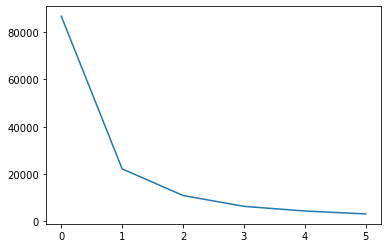

In [15]:
costPlot(data1,3)